Dans ce projet, nous avons utilisé une approche de régression linéaire pour prédire les ventes en fonction des dépenses publicitaires dans trois médias : la télévision, la radio et les journaux. Le dataset contient les informations sur les dépenses publicitaires et les ventes associées. Après avoir prétraité et nettoyé les données, nous avons entraîné un modèle de régression linéaire pour établir la relation entre les variables d'entrée (publicité) et la variable cible (ventes). Nous avons évalué la performance du modèle à l’aide de métriques comme le MAE, MSE, RMSE et le R², qui montrent que notre modèle est capable de prédire les ventes avec un R² de 0.91, indiquant une très bonne précision.

Importation de pandas

In [2]:
import pandas as pd

-1-Exploration et prétraitement:

Chargement de dataset

In [6]:
sa = pd.read_csv(r"C:\Users\MOI\Desktop\co\advertising.csv")

Affichage des premiers lignes de dataset

In [12]:
sa.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Vérification des données de dataset

In [14]:
sa.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Vérification des statistiques générales du dataset

In [16]:
sa.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Vérification des données manquantes

In [18]:
sa.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Visualisation de distribution des ventes 

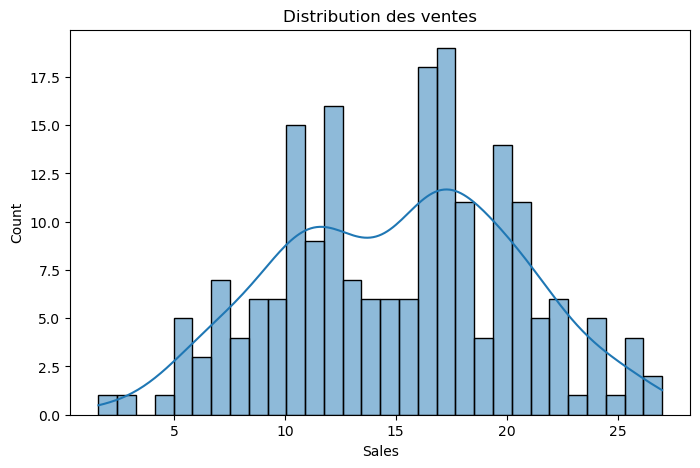

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(sa["Sales"], bins=30, kde=True)
plt.title("Distribution des ventes")
plt.show()


Vérification de la corrélation entre les variables 

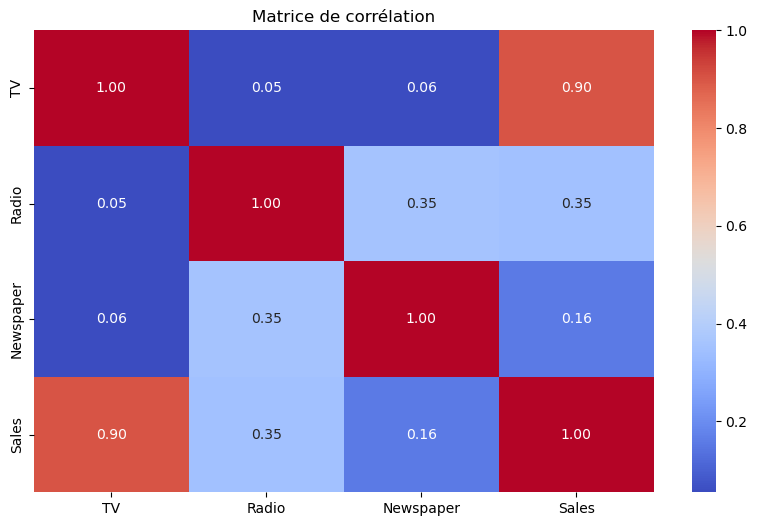

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(sa.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

-2-Tronsformation et nettoyage:
Nous n'avons pas de données manquantes dans le dataset (pas de remplissage nécessaire) et toutes les colonnes ont des valeurs numériques (pas de transformation nécessaire).
On remarque que la colonne 'Newspaper' n'a pas une grande influence sur la prédiction, mais nous avons choisi de la garder pour une meilleure prédiction.On veut utiliser une régression linéaire simple donc la normalisation n'est pas nécessaire.

-3-Preparation des données et application de modèle :

Importation des bibliothèques 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Séparation des données 

In [36]:
X = sa[["TV", "Radio", "Newspaper"]]
y = sa["Sales"]

Division des données (en train (80%) et test (20%)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialisation du modèle de régression linéaire

In [41]:
model = LinearRegression()

Entraînement du modèle

In [43]:
model.fit(X_train, y_train)

LinearRegression()

Calcul des coefficient(Les coefficients nous indiquent l’impact de chaque variable sur les ventes)

In [45]:
print("Coefficients du modèle :", model.coef_)
print("Intercept :", model.intercept_)

Coefficients du modèle : [0.05450927 0.10094536 0.00433665]
Intercept : 4.714126402214134


L'intercept représente la valeur de ventes quand toutes les variables indépendantes (TV, Radio, Newspaper) sont égales à 0. Dans ce cas, si aucune publicité n'est faite, les ventes prédites seraient de 4.71 unités.

Prédiction sur l’ensemble de test

In [57]:
y_pred = model.predict(X_test)
print(y_pred)

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


-4-Evaluation:

Calcul des métriques d’évaluation

In [52]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5 
r2 = r2_score(y_test, y_pred)
print(f"MAE (Erreur absolue moyenne) : {mae:.2f}")
print(f"MSE (Erreur quadratique moyenne) : {mse:.2f}")
print(f"RMSE (Racine carrée du MSE) : {rmse:.2f}")
print(f"R² (Coefficient de détermination) : {r2:.2f}")

MAE (Erreur absolue moyenne) : 1.27
MSE (Erreur quadratique moyenne) : 2.91
RMSE (Racine carrée du MSE) : 1.71
R² (Coefficient de détermination) : 0.91


-5-Visualisation finale :

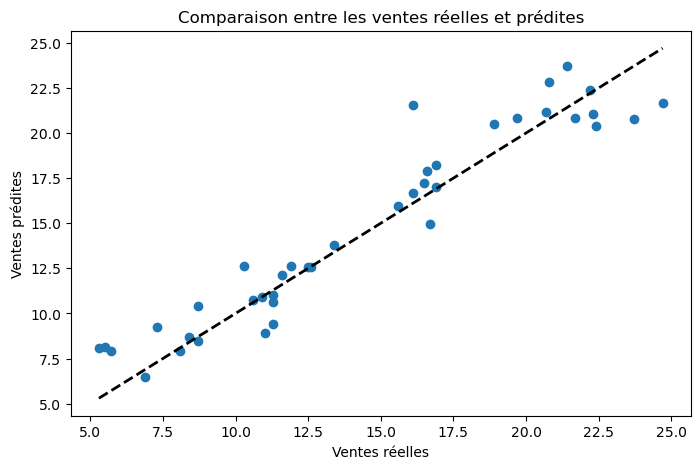

In [55]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Ventes réelles")
plt.ylabel("Ventes prédites")
plt.title("Comparaison entre les ventes réelles et prédites")
plt.show()


-6-Enregistrement du modèle :

In [59]:
import joblib
joblib.dump(model, 'model_sales_prediction.pkl')

['model_sales_prediction.pkl']

En conclusion, le modèle de régression linéaire développé dans ce projet montre une forte capacité à prédire les ventes en fonction des dépenses publicitaires, avec un R² de 0.91, ce qui signifie que 91% de la variance des ventes peut être expliquée par les dépenses en publicité. Bien que la variable 'Newspaper' ait une faible influence sur les ventes, elle a été conservée pour assurer une prédiction complète et précise. Les résultats montrent également que la télévision et la radio ont un impact significatif sur les ventes, ce qui peut guider les entreprises dans l'allocation de leurs budgets publicitaires. À l'avenir, il serait possible d'améliorer encore ce modèle en explorant des techniques plus avancées, telles que la régression polynomiale ou l'utilisation de modèles d'apprentissage automatique plus complexes, pour mieux capturer les relations non linéaires entre les variables.